In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df = pd.read_csv('/tmp/inputs/bioethics.csv', delimiter=';', encoding = "ISO-8859-1", nrows = nRowsRead)
df.dataframeName = 'bioethics.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
print(df.head())

There are 33 rows and 21 columns


,Approved_Short_Indication,Active_Ingredient,NDA_Sponsor,Approval_Date,Trial,Phase,Study_Population,Participants,ClinicalTrials_gov_Registration_ID_NCT,Conditions,...,Study_Designs,First_Received,Start_Date,Results_First_Received,Primary_Completion_Date,Certificate_of_Delay,US_Clinical_Trial_Site,Publication_Link,Publication_Date,Epub_Date
0,HIV,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,GILEAD SCIENCES INC,05/11/2015,Trial 1,3,Tx-naïve adults,180,NCT00158821,HIV Infections,...,Endpoint Classification: Safety/Efficacy Study...,07/09/2005,01/03/2000,No Study Results Posted,01/12/2001,N,Unknown,http://www.ncbi.nlm.nih.gov/pubmed/18042503,01/11/2007,*
1,HIV,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,GILEAD SCIENCES INC,05/11/2015,Trial 2,3,*,87,NCT00352053,HIV Infections,...,Allocation: Randomized|Endpoint Classification...,13/07/2006,01/06/2006,05/03/2010,01/09/2008,N,N,https://www.ncbi.nlm.nih.gov/pubmed/25599284,01/04/2015,*
2,HIV,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,GILEAD SCIENCES INC,05/11/2015,Trial 3,1,PK and antiviral activity (Viread?),40,*,*,...,*,*,*,*,*,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed/23807155,01/08/2013,*
3,HIV,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,GILEAD SCIENCES INC,05/11/2015,Trial 4,*,HIV-/HBV- with severe renal impairment,27,*,*,...,*,*,*,*,*,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed/27216057,23/05/2016,*
4,HIV,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,GILEAD SCIENCES INC,05/11/2015,Trial 5,*,healthy,*,*,*,...,*,*,*,*,*,NaN,NaN,*,*,*


In [3]:
print(df.isnull().sum())

Approved_Short_Indication                  0
Active_Ingredient                          0
NDA_Sponsor                                0
Approval_Date                              0
Trial                                      0
Phase                                      0
Study_Population                           0
Participants                               0
ClinicalTrials_gov_Registration_ID_NCT     0
Conditions                                 0
Study_Types                                0
Study_Designs                              0
First_Received                             0
Start_Date                                 0
Results_First_Received                     0
Primary_Completion_Date                    0
Certificate_of_Delay                      15
US_Clinical_Trial_Site                    15
Publication_Link                           0
Publication_Date                           0
Epub_Date                                  0
dtype: int64

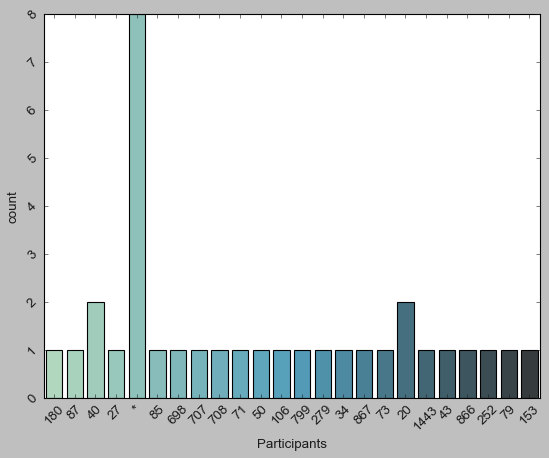

In [7]:
"""#Refusing Vaccination. No Herd Immunity.

When the number of people who decline or refuse vaccinations increases, it becomes impossible to reach herd immunity. Then, infectious disease agents can lurk in the population, threatening not only those who have chosen not to vaccinate but also those who cannot receive vaccinations, e.g. newborns and the immune-compromised. Thus, when healthy people refuse vaccinations, they put not only themselves but also the most vulnerable members of society at risk.
"""

sns.countplot(x="Participants",data=df,palette="GnBu_d",edgecolor="black")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

Text(0.5, 0, 'Count')

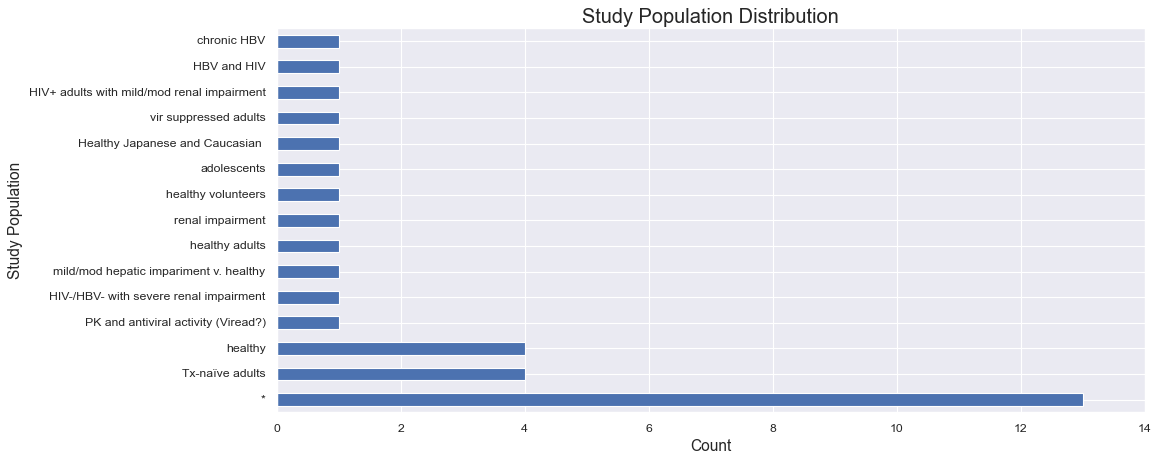

In [11]:
ax = df['Study_Population'].value_counts().plot.barh(figsize=(14, 6))
ax.set_title('Study Population Distribution', size=18)
ax.set_ylabel('Study Population', size=14)
ax.set_xlabel('Count', size=14)

Text(0.5, 0, 'Count')

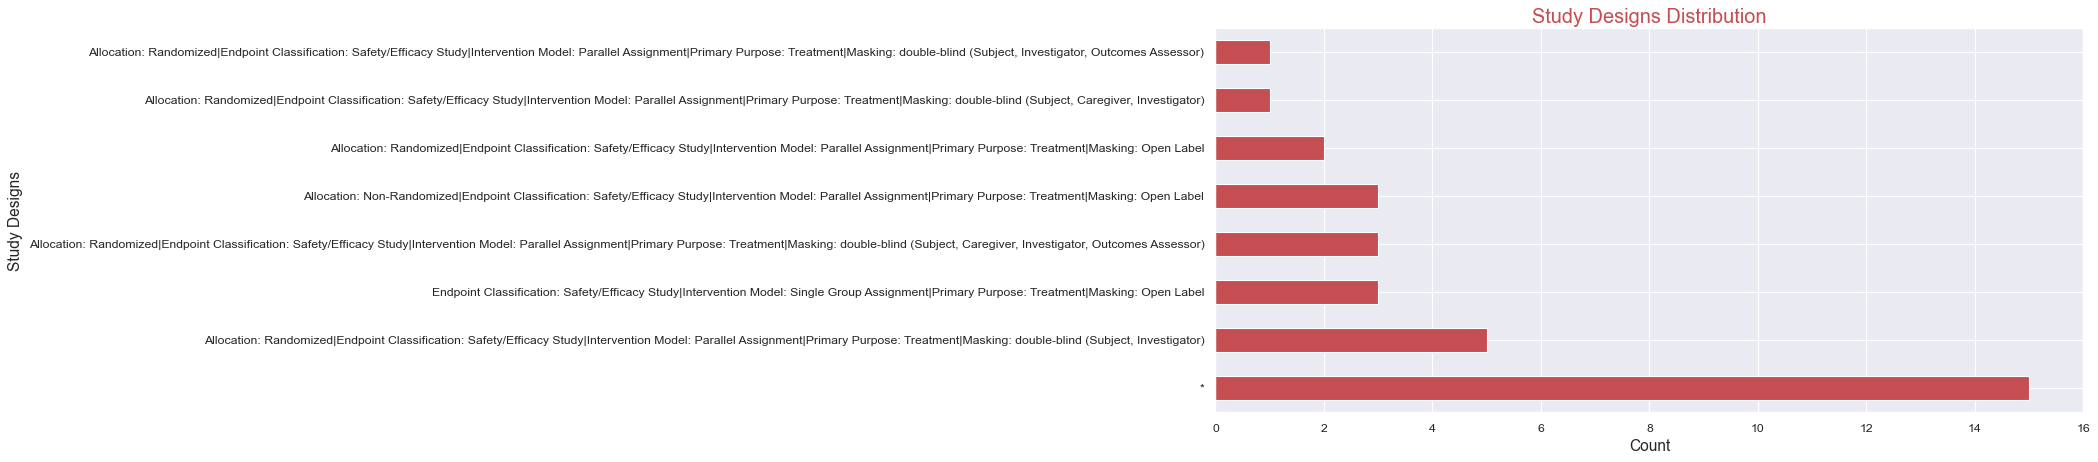

In [12]:
ax = df['Study_Designs'].value_counts().plot.barh(figsize=(14, 6), color='r')
ax.set_title('Study Designs Distribution', size=18, color='r')
ax.set_ylabel('Study Designs', size=14)
ax.set_xlabel('Count', size=14)

Text(0.5, 0, 'Count')

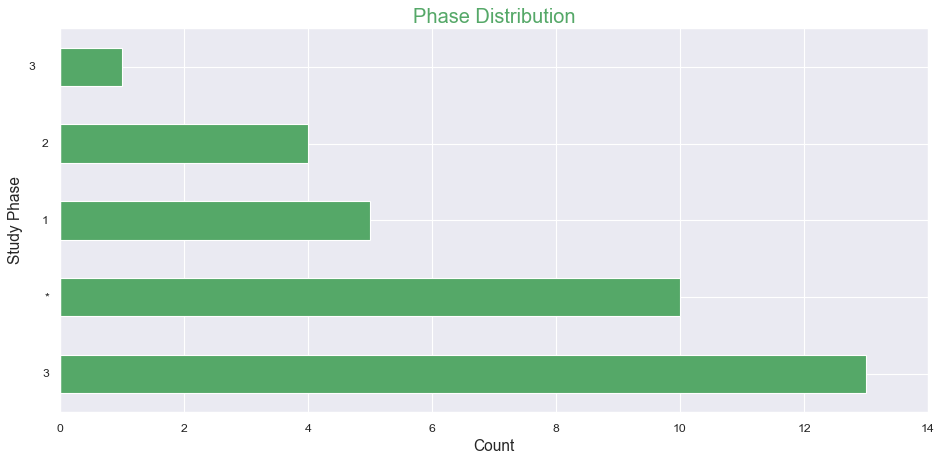

In [13]:
ax = df['Phase'].value_counts().plot.barh(figsize=(14, 6), color='g')
ax.set_title('Phase Distribution', size=18, color='g')
ax.set_ylabel('Study Phase', size=14)
ax.set_xlabel('Count', size=14)

In [14]:
fig = px.bar(df[['Study_Population','Participants']].sort_values('Participants', ascending=False), 
                        y = "Participants", x= "Study_Population", color='Participants', template='ggplot2')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig.update_layout(title_text="Bioethics Trials and Results")

fig.show()

In [16]:
import plotly.offline as pyo
import plotly.graph_objs as go
lowerdf = df.groupby('Study_Population').size()/df['Participants'].count()*100
labels = lowerdf.index
values = lowerdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,marker_colors = px.colors.sequential.speed, hole=.6)])
fig.show()

In [18]:
fig = px.bar(df, x= "First_Received", y= "Conditions", color_discrete_sequence=['crimson'], title='First Received & Participants Conditions')
fig.show()

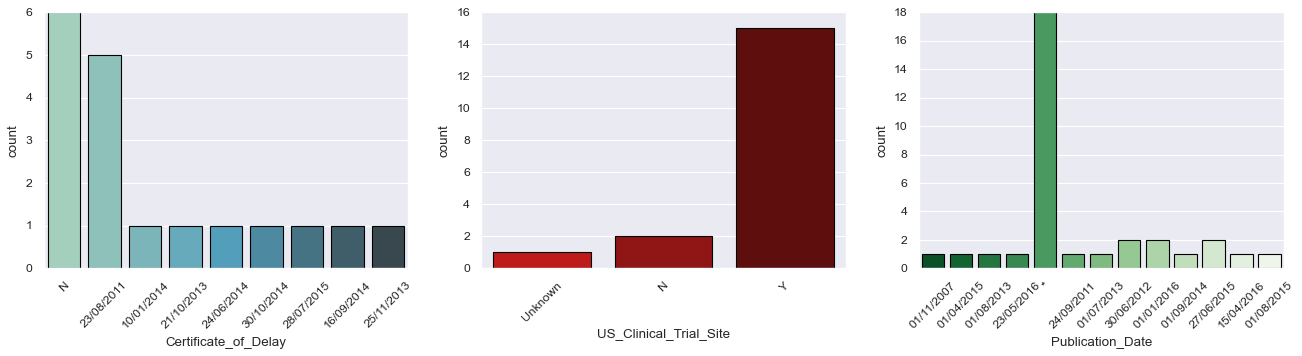

In [19]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Certificate_of_Delay', data = df, palette="GnBu_d",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(132)
sns.countplot(x= 'US_Clinical_Trial_Site', data = df, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'Publication_Date', data = df, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()